In [97]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [86]:
os.chdir(r'C:\Users\786552\Ydealogy\datasets')
file = pd.read_csv('concrete.csv')
file.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,475.0,0.0,0.0,228.0,0.0,932.0,594.0,7,38.60
1,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
2,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.23
3,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.13


In [87]:
file.shape

(1009, 9)

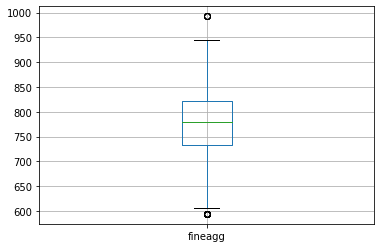

In [88]:
%matplotlib inline
file.boxplot('fineagg')

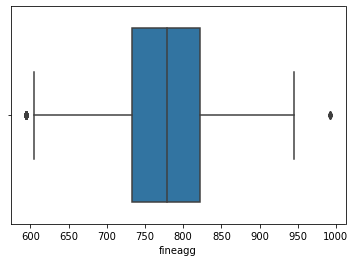

In [89]:
import seaborn as sns
sns.boxplot(x=file['fineagg'])

In [94]:
def calc_adjstr2(x,y,predict):
    r2 = r2_score(y,predict)
    n= len(y)
    p= x.shape[1]
    adjstr2 = 1-(1-r2) * (n-1) / (n-p-1)
    return("r2 = ",r2 ,"adjstr2 : ",adjstr2)

In [109]:
linearModel = LinearRegression()
x= file.loc[:,['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']]
y= file.loc[:,'strength']
RFE_model = RFE(linearModel,1)
RFE_model.fit(x,y)

Ranking = pd.DataFrame(RFE_model.ranking_).T
Ranking.columns = x.columns
Ranking

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,4,5,6,2,1,8,7,3


In [126]:
linearModel = LinearRegression()
x= file.loc[:,['superplastic','water','age','cement','slag','ash']]
y= file.loc[:,'strength']
linearModel.fit(x,y)
predictedStr = linearModel.predict(x) #Test data
print(calc_adjstr2(x,y,predictedStr))

('r2 = ', 0.6229261718648408, 'adjstr2 : ', 0.620668244750259)


In [127]:
Residual = pd.DataFrame()
Residual['OrginalStrength'] = y
Residual['PredictedStrength'] =predictedStr
Residual['Residual'] = y -predictedStr
Residual.to_csv('concretePredicted.csv')

In [137]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictedStr))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictedStr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictedStr)))

Mean Absolute Error: 8.124339610174507
Mean Squared Error: 104.76192034405868
Root Mean Squared Error: 10.235327075577931
